![Verne](https://www.vernegroup.com/wp-content/uploads/2020/07/LOGO-VERNE-TECHNOLOGY-GROUP-3.png)

# Visualización con Pandas

In [1]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt



In [2]:
conn = sqlite3.connect('Tiendas24H.sqlite')
query = "SELECT * FROM Clientes"

df = pd.read_sql_query(query,conn)

df.head()

index CodCliente     Nombre Apellidos FechaNacimiento EstadoCivil Sexo  \
0      0     000020        Jon      Yang      1976-04-08           M    M   
1      1     000026     Eugene     Huang      1975-05-14           S    M   
2      2     000029      Ruben    Torres      1975-08-12           M    M   
3      3     000046    Christy       Zhu      1978-02-15           S    F   
4      4     000047  Elizabeth   Johnson      1978-08-08           S    F   

                    Email  IngresosAnuales  HijosACargo  NivelAcademico  \
0       jon24@outlook.com          90000.0          0.0               4   
1    eugene10@outlook.com          60000.0          3.0               4   
2     ruben35@outlook.com          60000.0          3.0               4   
3   christy12@outlook.com          70000.0          0.0               4   
4  elizabeth5@outlook.com          80000.0          5.0               4   

   Ocupacion  
0          5  
1          5  
2          5  
3          5  
4          5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2441 non-null   int64  
 1   CodCliente       2441 non-null   object 
 2   Nombre           2441 non-null   object 
 3   Apellidos        2441 non-null   object 
 4   FechaNacimiento  2441 non-null   object 
 5   EstadoCivil      2440 non-null   object 
 6   Sexo             2440 non-null   object 
 7   Email            2440 non-null   object 
 8   IngresosAnuales  2440 non-null   float64
 9   HijosACargo      2440 non-null   float64
 10  NivelAcademico   2441 non-null   int64  
 11  Ocupacion        2441 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 229.0+ KB


In [4]:
df.describe()

index  IngresosAnuales  HijosACargo  NivelAcademico    Ocupacion
count  2441.000000      2440.000000  2440.000000     2441.000000  2441.000000
mean   1220.000000     60475.409836     1.027049        3.382630     4.198279
std     704.800326     33549.413567     1.526077        1.738266     1.504642
min       0.000000     10000.000000     0.000000        1.000000     1.000000
25%     610.000000     40000.000000     0.000000        2.000000     3.000000
50%    1220.000000     60000.000000     0.000000        4.000000     4.000000
75%    1830.000000     80000.000000     2.000000        4.000000     5.000000
max    2440.000000    170000.000000     5.000000        6.000000     6.000000

In [8]:
df["IngresosAnuales"].mean()

60475.40983606558

In [5]:
print(df.corr())

index  IngresosAnuales  HijosACargo  NivelAcademico  \
index            1.000000         0.077033     0.044170        0.006476   
IngresosAnuales  0.077033         1.000000     0.480152        0.165649   
HijosACargo      0.044170         0.480152     1.000000       -0.086732   
NivelAcademico   0.006476         0.165649    -0.086732        1.000000   
Ocupacion        0.073188         0.761700     0.244298        0.268549   

                 Ocupacion  
index             0.073188  
IngresosAnuales   0.761700  
HijosACargo       0.244298  
NivelAcademico    0.268549  
Ocupacion         1.000000  


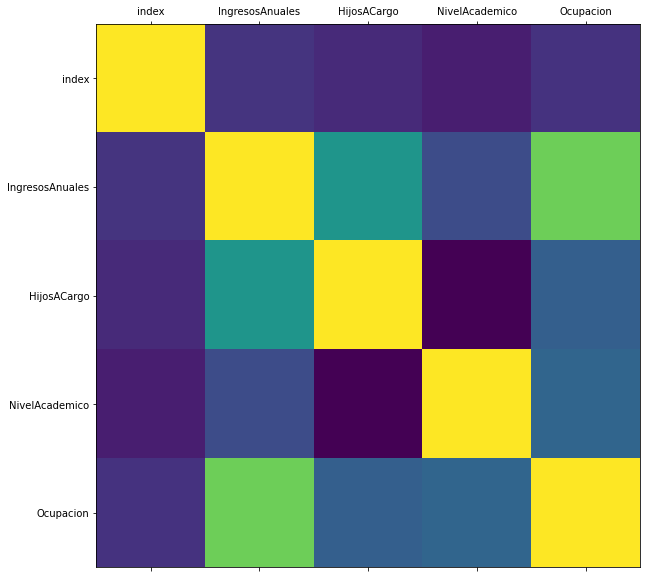

In [7]:
    correlacion = df.corr() 
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.matshow(correlacion) 
    plt.xticks(range(len(correlacion.columns)), correlacion.columns); 
    plt.yticks(range(len(correlacion.columns)), correlacion.columns); 

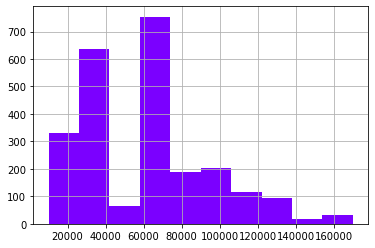

In [26]:
df.IngresosAnuales.hist()

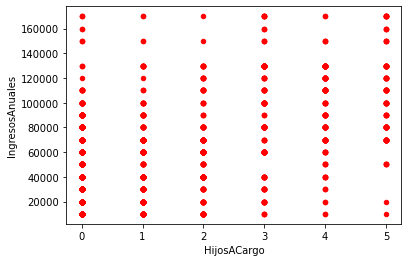

In [5]:
# plot HijosACargo e Ingresos anuales
df.plot(kind='scatter',x='HijosACargo',y='IngresosAnuales',color='red')

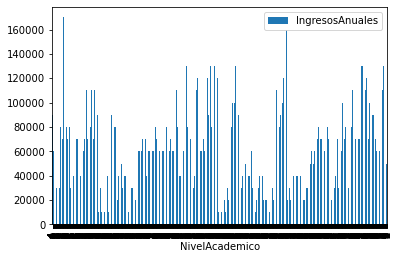

In [8]:
df.plot(kind='bar',x='NivelAcademico',y='IngresosAnuales')

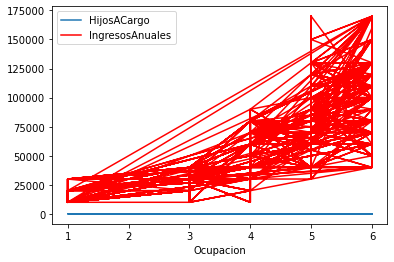

In [9]:
plt.clf()
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='Ocupacion',y='HijosACargo',ax=ax)
df.plot(kind='line',x='Ocupacion',y='IngresosAnuales', color='red', ax=ax)

plt.show()

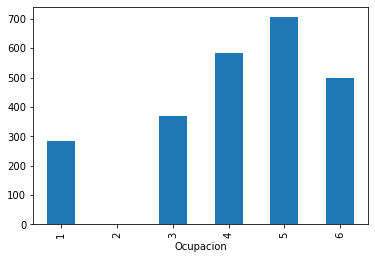

In [10]:
df.groupby('Ocupacion').size().plot(kind='bar')

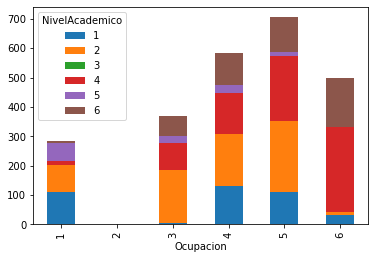

In [11]:
df.groupby(['Ocupacion','NivelAcademico']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

<Figure size 432x288 with 0 Axes>

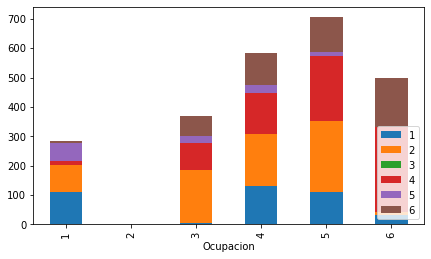

In [12]:
plt.clf()
df.groupby(['Ocupacion','NivelAcademico'])['IngresosAnuales'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc='lower right')
plt.gcf().set_size_inches(7,4)
plt.show()

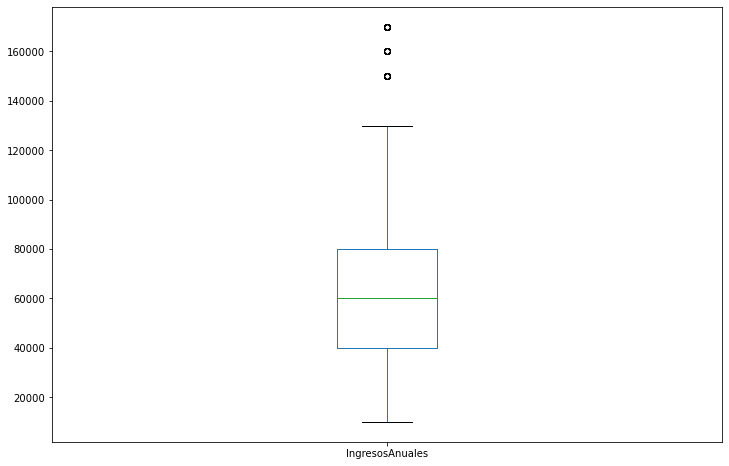

In [13]:
df['IngresosAnuales'].plot(kind='box',figsize=(12,8))

In [14]:
df['FechaNacimiento'] = pd.to_datetime(df['FechaNacimiento'],infer_datetime_format=True)
df

index CodCliente     Nombre Apellidos FechaNacimiento EstadoCivil Sexo  \
0         0     000020        Jon      Yang      1976-04-08           M    M   
1         1     000026     Eugene     Huang      1975-05-14           S    M   
2         2     000029      Ruben    Torres      1975-08-12           M    M   
3         3     000046    Christy       Zhu      1978-02-15           S    F   
4         4     000047  Elizabeth   Johnson      1978-08-08           S    F   
...     ...        ...        ...       ...             ...         ...  ...   
2436   2436  Y1795344R      Tracy       Pal      1944-09-17           M    F   
2437   2437  Y2404085R       Gail   Griffin      1973-01-04           S    F   
2438   2438  Y2544794L      Ethan    Flores      1973-08-26           M    M   
2439   2439  Y2671043K      Chloe   Griffin      1973-10-23           S    F   
2440   2440  Y2716961P     Arturo       Lin      1973-03-16           M    M   

                       Email  IngresosAnuales  HijosACargo  NivelAcademico  \
0          jon24@outlook.com          90000.0          0.0               4   
1       eugene10@outlook.com          60000.0          3.0               4   
2        ruben35@outlook.com          60000.0          3.0               4   
3      christy12@outlook.com          70000.0          0.0               4   
4     elizabeth5@outlook.com          80000.0          5.0               4   
...                      ...              ...          ...             ...   
2436     tracy11@outlook.com          70000.0          0.0               6   
2437       gail7@outlook.com          90000.0          0.0               2   
2438      ethan9@outlook.com          90000.0          0.0               2   
2439     chloe86@outlook.com          90000.0          0.0               2   
2440     arturo8@outlook.com         110000.0          2.0               4   

      Ocupacion  
0             5  
1             5  
2             5  
3             5  
4             5  
...         ...  
2436          6  
2437          5  
2438          5  
2439          5  
2440          6  

[2441 rows x 12 columns]

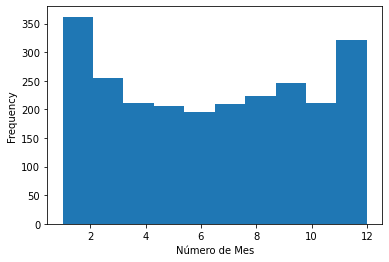

In [15]:
plt.clf()
df['FechaNacimiento'].map(lambda d: d.month).plot(kind='hist')
plt.xlabel('Número de Mes')
#plotting.add_grid()
plt.show()

# Visualización con Seaborn

In [16]:
import seaborn as sns


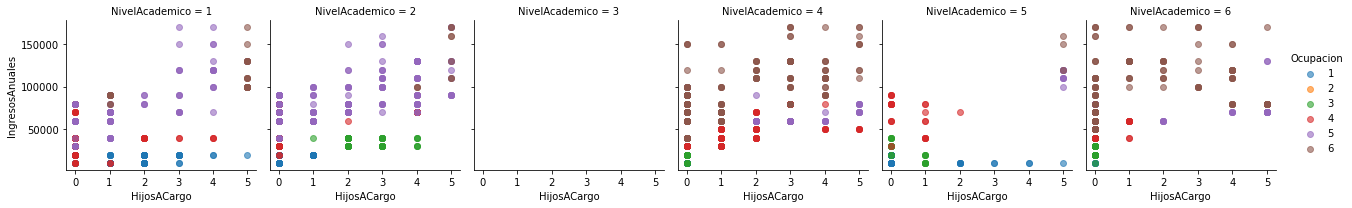

In [17]:

g = sns.FacetGrid(df, col="NivelAcademico", hue="Ocupacion")
g.map(plt.scatter, "HijosACargo", "IngresosAnuales", alpha=.6)
g.add_legend()
plt.show()

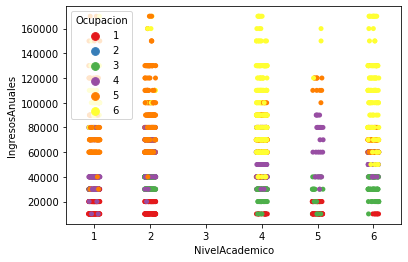

In [20]:
sns.stripplot(x="NivelAcademico", y="IngresosAnuales", hue= "Ocupacion", data=df, palette="Set1")
plt.show()

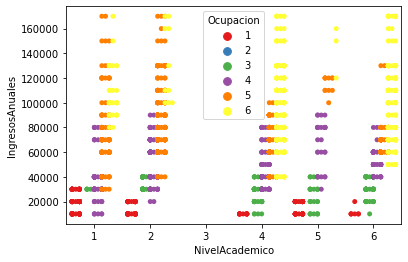

In [21]:
sns.swarmplot(x="NivelAcademico", y="IngresosAnuales", hue="Ocupacion",data=df, palette="Set1", dodge=True)
plt.show()

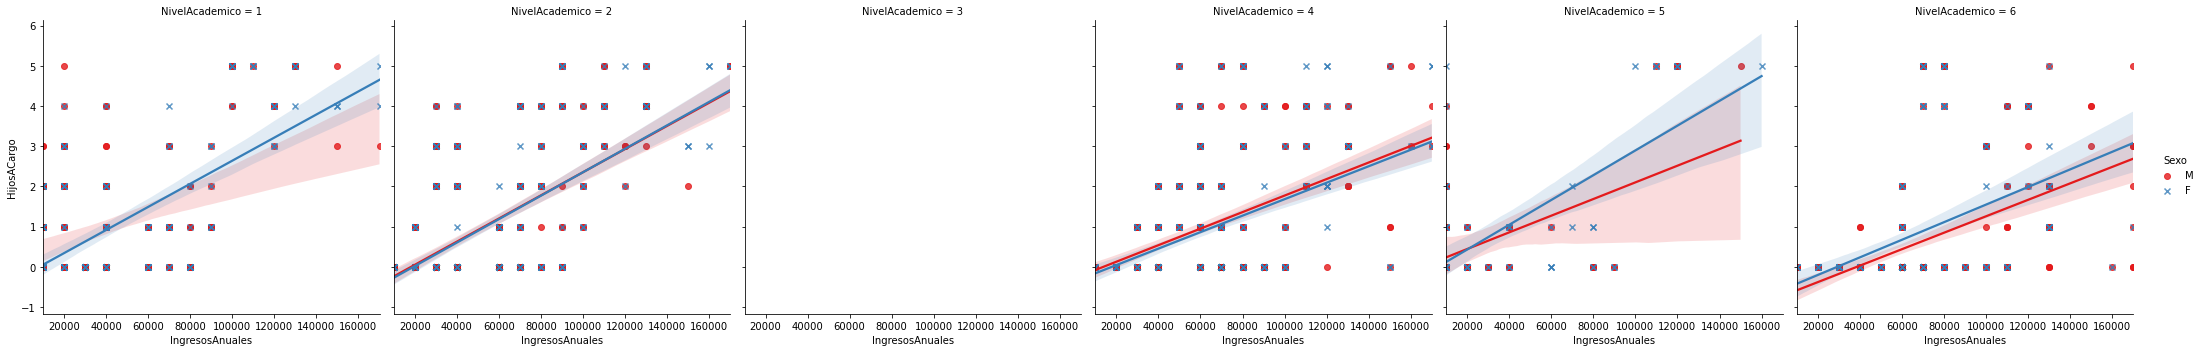

In [22]:
sns.lmplot(x="IngresosAnuales", y="HijosACargo", hue="Sexo", col="NivelAcademico", markers=["o", "x"],palette="Set1",data=df)
plt.show()

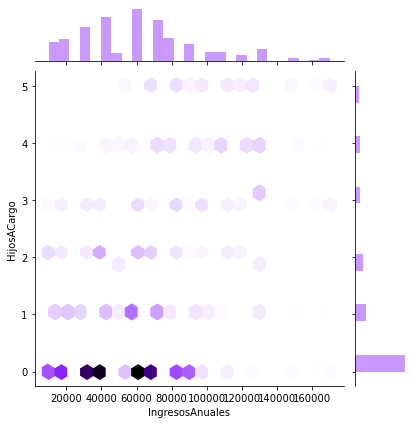

In [23]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="IngresosAnuales", y="HijosACargo", kind="hex",data=df )
plt.show()

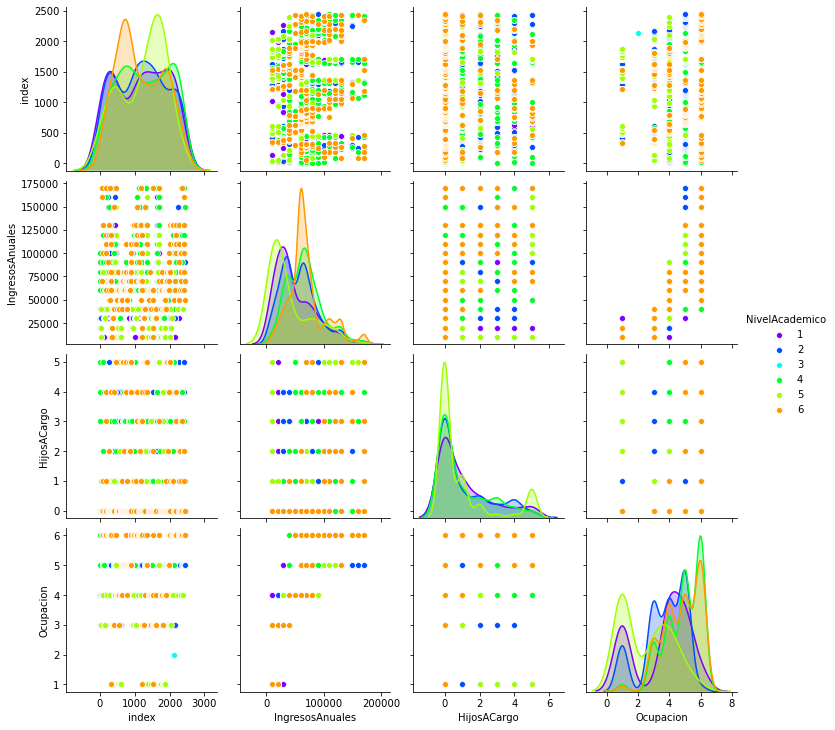

In [25]:
sns.pairplot(df, hue="NivelAcademico") 
plt.show()